**FAKE NEWS PREDICTION**

Fake News Detection is a prediction technique which starts first by preprocessing the input text, getting numerical features, and then training a machine learning model like Logistic Regression, SVM, Naive Bayes and Neural Networks to predict whether the news is reliable or not.

Hypothesis - Using a supervised data of news , we would be able to train the model and predict whether the news is Legit or Fake

Details about the Dataset:

title: the title of a news article
text: the text of the article; could be incomplete
label: a label that marks whether the news article is legit or fake: 1: Fake news 0: legit or real news
**Here We Begin !!!**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics


Our models would be trained on vectors. To have vectors based on meaningful words, we would be removing the english stopwords

In [ ]:
import nltk
nltk.download('stopwords')
# printing the stopwords in English
#print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Pre-processing the data !

In [ ]:

# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('news.csv')
#news_dataset.shape

# counting the number of missing values in the dataset
news_dataset.isnull().sum()

# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

# print the first 5 rows of the dataframe
news_dataset.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Visualizing the correlation between features - if any !

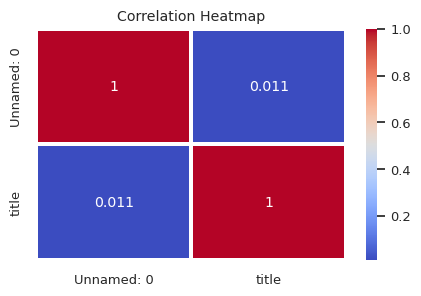

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

news_dataset_for_corr = news_dataset.copy()
news_dataset_NN = news_dataset.copy()

label_encoder = LabelEncoder()
news_dataset_for_corr['title'] = label_encoder.fit_transform(news_dataset_for_corr['title'])
news_dataset_for_corr['text'] = label_encoder.fit_transform(news_dataset_for_corr['text'])
# news_dataset_for_corr.head()
col_To_Exclude = ['text' , 'label']
news_dataset_for_corr = news_dataset_for_corr.drop(col_To_Exclude , axis =1)
correlation_matrix = news_dataset_for_corr.corr()
#correlation_matrix

plt.figure(figsize=(5, 3))
sns.set(font_scale=0.85)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=1.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# merging the author name and news title
news_dataset['content'] = news_dataset['text']+' '+news_dataset['title']
print(news_dataset['content'])

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6702    The State Department told the Republican Natio...
6703    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6704     Anti-Trump Protesters Are Tools of the Oligar...
6705    ADDIS ABABA, Ethiopia —President Obama convene...
6706    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: content, Length: 6707, dtype: object


Stemming:

It is the process of reducing a word to its Root word.

example: swimmer,swimming -> swim

In [ ]:
news_port_stem = PorterStemmer()

Applying the stemming function to 'content' column.

In [ ]:
def news_words_stemming(content):
    news_stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    news_stemmed_content = news_stemmed_content.lower()
    news_stemmed_content = news_stemmed_content.split()
    news_stemmed_content = [news_port_stem.stem(word) for word in news_stemmed_content if not word in stopwords.words('english')]
    news_stemmed_content = ' '.join(news_stemmed_content)
    return news_stemmed_content

In [ ]:
news_dataset['content'] = news_dataset['content'].apply(news_words_stemming)
news_dataset_NN['content'] = news_dataset['content']  #copying the content in dataset to be used for Neural Networks

In [ ]:
print(news_dataset['content'])


0       daniel greenfield shillman journal fellow free...
1       googl pinterest digg linkedin reddit stumbleup...
2       u secretari state john f kerri said monday sto...
3       kayde king kaydeek novemb lesson tonight dem l...
4       primari day new york front runner hillari clin...
                              ...                        
6702    state depart told republican nation committe c...
6703    p pb stand plutocrat pentagon post oct wikimed...
6704    anti trump protest tool oligarchi reform alway...
6705    addi ababa ethiopia presid obama conven meet l...
6706    jeb bush suddenli attack trump matter jeb bush...
Name: content, Length: 6707, dtype: object


In [ ]:

#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

print(X[:5])
print(Y[:5])

['daniel greenfield shillman journal fellow freedom center new york writer focus radic islam final stretch elect hillari rodham clinton gone war fbi word unpreced thrown around often elect ought retir still unpreced nomine major polit parti go war fbi exactli hillari peopl done coma patient wake watch hour cnn hospit bed would assum fbi director jame comey hillari oppon elect fbi attack everyon obama cnn hillari peopl circul letter attack comey current media hit piec lambast target trump surpris clinton alli start run attack ad fbi fbi leadership warn entir left wing establish form lynch mob continu go hillari fbi credibl attack media democrat preemptiv head result investig clinton foundat hillari clinton covert struggl fbi agent obama doj peopl gone explos public new york time compar comey j edgar hoover bizarr headlin jame comey role recal hoover fbi fairli practic admit front spout nonsens boston globe publish column call comey resign outdon time editori claim scandal realli attack 

**Vectorization**

The return type of vectorizer.transform is Compressed Sparse Row (CSR) format

In [ ]:
# converting the textual data to numerical data
newsdataset_words_vectorizer = TfidfVectorizer()
newsdataset_words_vectorizer.fit(X)

X = newsdataset_words_vectorizer.transform(X)
print(X)

  (0, 43423)	0.030400363547051553
  (0, 43300)	0.018269143710713
  (0, 42992)	0.037037701064403676
  (0, 42988)	0.02409764682559539
  (0, 42961)	0.032994876478086965
  (0, 42928)	0.02372846535184427
  (0, 42926)	0.00875117693929736
  (0, 42860)	0.015828278899950567
  (0, 42800)	0.016705913143035607
  (0, 42713)	0.028410298961439793
  (0, 42712)	0.01675265765193893
  (0, 42675)	0.03844067862783259
  (0, 42633)	0.04263424924886423
  (0, 42536)	0.03474175950934718
  (0, 42481)	0.03582591812297503
  (0, 42467)	0.018330251226280608
  (0, 42388)	0.01389428499383481
  (0, 42356)	0.061995377060650086
  (0, 42250)	0.011488923354219015
  (0, 42219)	0.026949547713645078
  (0, 42143)	0.028688961328246044
  (0, 42082)	0.032632751353366275
  (0, 42034)	0.016366998987403573
  (0, 41986)	0.05346087388324429
  (0, 41954)	0.07033875522230473
  :	:
  (6706, 3921)	0.028491350915404834
  (6706, 3920)	0.026286191402642305
  (6706, 3742)	0.03537182063151891
  (6706, 3735)	0.02046091241464131
  (6706, 3457)	0

Lets try to understand 1 document , which is represented as a sparse matrix

Eg: darrel lucu hous dem aid even see comey letter jason chaffetz tweet


**Explanation:** The word darrel is present in the 15686th column in 0th row, and its importance is 0.2848. According to this, it means the second last word "chaffetz" is most important in THIS sentence.

In [ ]:
example_of_vector = X[0:1]
print(example_of_vector)


  (0, 43423)	0.030400363547051553
  (0, 43300)	0.018269143710713
  (0, 42992)	0.037037701064403676
  (0, 42988)	0.02409764682559539
  (0, 42961)	0.032994876478086965
  (0, 42928)	0.02372846535184427
  (0, 42926)	0.00875117693929736
  (0, 42860)	0.015828278899950567
  (0, 42800)	0.016705913143035607
  (0, 42713)	0.028410298961439793
  (0, 42712)	0.01675265765193893
  (0, 42675)	0.03844067862783259
  (0, 42633)	0.04263424924886423
  (0, 42536)	0.03474175950934718
  (0, 42481)	0.03582591812297503
  (0, 42467)	0.018330251226280608
  (0, 42388)	0.01389428499383481
  (0, 42356)	0.061995377060650086
  (0, 42250)	0.011488923354219015
  (0, 42219)	0.026949547713645078
  (0, 42143)	0.028688961328246044
  (0, 42082)	0.032632751353366275
  (0, 42034)	0.016366998987403573
  (0, 41986)	0.05346087388324429
  (0, 41954)	0.07033875522230473
  :	:
  (0, 1788)	0.018788765941085375
  (0, 1749)	0.027486465753252122
  (0, 1718)	0.04145010340314546
  (0, 1670)	0.02601814248436607
  (0, 1552)	0.02501485928749

Now that our documents / text is converted into a multidimensional space, lets train different models.

Starting with , splitting the dataset to training & test data

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)


First Model : Logistic Regression

Metrics :

1.Accuracy

2.Cross Validation

3.Cross Validation Performance with K folds

4.ROC curve

5.Confusion Metrics

Accuracy score of the training data :  0.9549
Accuracy score of the test data :  0.9247
Cross-Validation Scores: [0.92101341 0.914307   0.91648024 0.91648024 0.91648024]


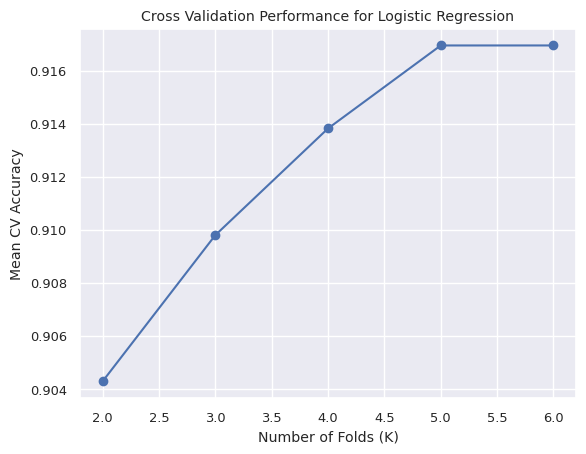

In [ ]:

# Logistic regression is a statistical model used for binary classification.
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = logistic_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# accuracy score on the test data
from sklearn.model_selection import cross_val_score

X_test_prediction = logistic_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

scores = cross_val_score(logistic_model, X, Y, cv=5, scoring='accuracy')


#Printing the metrics
print('Accuracy score of the training data : ' ,round(training_data_accuracy,4))
print('Accuracy score of the test data : ', round(test_data_accuracy,4) )
print("Cross-Validation Scores:", scores)

#plotting the cross validation
k_values = range(2,7)
cv_scores = []

for k in k_values:
    scores = cross_val_score(logistic_model, X, Y, cv=k, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Plot the cross-validation results
plt.figure()
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('Cross Validation Performance for Logistic Regression')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()



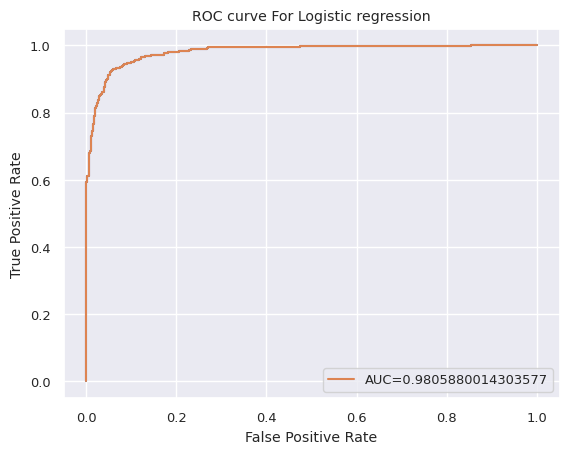

In [ ]:
#define metrics
y_pred_proba = logistic_model.predict_proba(X_test)[::,1]
# Map string labels to numerical labels
Y_test_numeric = [1 if label == 'REAL' else 0 for label in Y_test]
fpr, tpr, _ = metrics.roc_curve(Y_test_numeric,  y_pred_proba) # Use numerical labels
auc = metrics.roc_auc_score(Y_test_numeric, y_pred_proba) # Use numerical labels

#create ROC curve
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC curve For Logistic regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

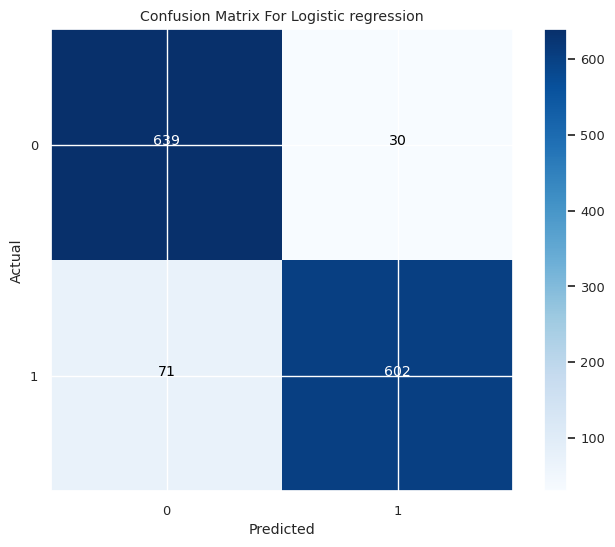

In [ ]:
cm = confusion_matrix(Y_test, X_test_prediction)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix For Logistic regression')
plt.colorbar()
tick_marks = range(len(set(Y_test)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(len(tick_marks)):
    for j in range(len(tick_marks)):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='White' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()

Second Model : Support Vector Model

Metrics :

1.Accuracy

2.Cross Validation

3.Cross Validation Performance with K folds

4.ROC curve --- Not added

5.Confusion Metrics

Accuracy score of the training data :  0.9493
Cross-Validation Scores: [0.94634873 0.92548435 0.93064877 0.93736018 0.93586875]


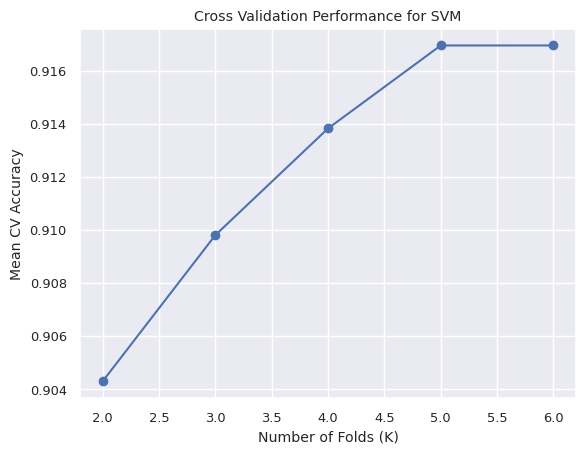

In [ ]:
# SVM

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels based on your data

# Train the SVM on the training data
svm_classifier.fit(X_train, Y_train)

X_test_prediction = svm_classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the training data : ', round(testing_data_accuracy,4))


scores = cross_val_score(svm_classifier, X, Y, cv=5, scoring='accuracy')


#Print the cross-validation scores
print("Cross-Validation Scores:", scores)

#Uncomment this to run- takes 7-8 mins
'''k_values = range(2,7)
cv_scores = []

for k in k_values:
    scores = cross_val_score(svm_classifier, X, Y, cv=k, scoring='accuracy')
    cv_scores.append(np.mean(scores))'''

# Plot the cross-validation results
plt.figure()
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('Cross Validation Performance for SVM')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()

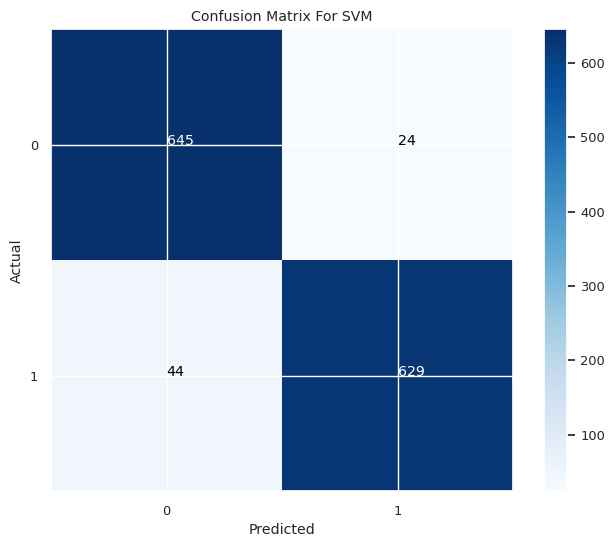

In [ ]:
cm = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix For SVM')
plt.colorbar()
tick_marks = range(len(set(Y_test)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(len(tick_marks)):
    for j in range(len(tick_marks)):
        plt.text(j, i, cm[i, j], color='White' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()

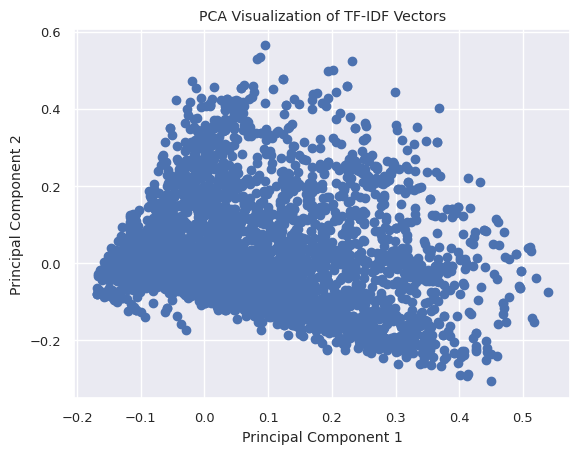

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X contains your TF-IDF vectors
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X.toarray())

# Plot the reduced data
plt.scatter(reduced_X[:, 0], reduced_X[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of TF-IDF Vectors')
plt.show()


Third Model : Naive Bayes

Metrics :

1.Accuracy

2.Cross Validation

3.Cross Validation Performance with K folds

4.ROC curve

5.Confusion Metrics

Details: Variants of Naive Bayes

1.Bernouli - Binary 2)Multinomial: discrete features (word count)

2.Gaussian : real valued features

We are using Multinomial NB.

Accuracy score of the training data :  0.9090909090909091
Cross-Validation Scores: [0.92026826 0.90387481 0.91126025 0.89858315 0.90380313]


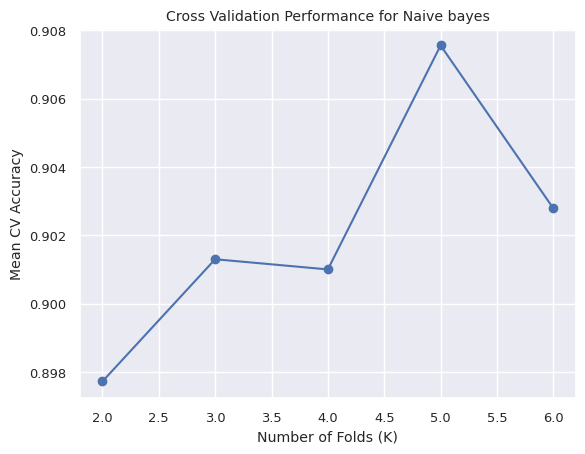

In [ ]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB

naive_model = MultinomialNB(alpha=0.01)

# Train the Naive Bayes on the training data
naive_model.fit(X_train, Y_train)

X_test_prediction = naive_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

scores = cross_val_score(naive_model, X, Y, cv=5, scoring='accuracy')

print('Accuracy score of the training data : ',test_data_accuracy)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

k_values = range(2,7)
cv_scores = []

for k in k_values:
    scores = cross_val_score(naive_model, X, Y, cv=k, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Plot the cross-validation results
plt.figure()
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('Cross Validation Performance for Naive bayes')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()


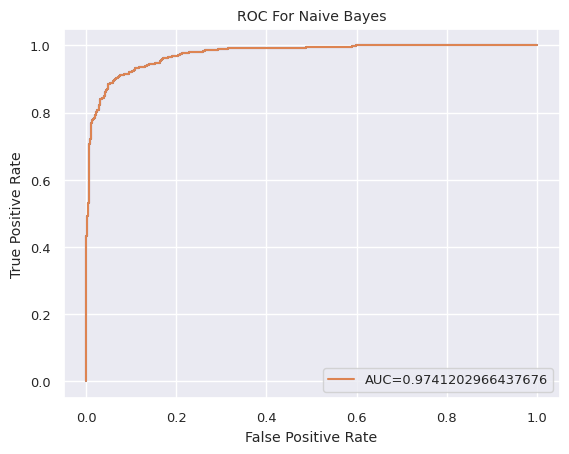

In [ ]:
#define metrics
y_pred_proba = naive_model.predict_proba(X_test)[::,1]
# Convert string labels to numeric (assuming 'REAL' is the positive class)
Y_test_numeric = [1 if y == 'REAL' else 0 for y in Y_test]
fpr, tpr, _ = metrics.roc_curve(Y_test_numeric,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test_numeric, y_pred_proba)

#create ROC curve
plt.title('ROC For Naive Bayes')
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

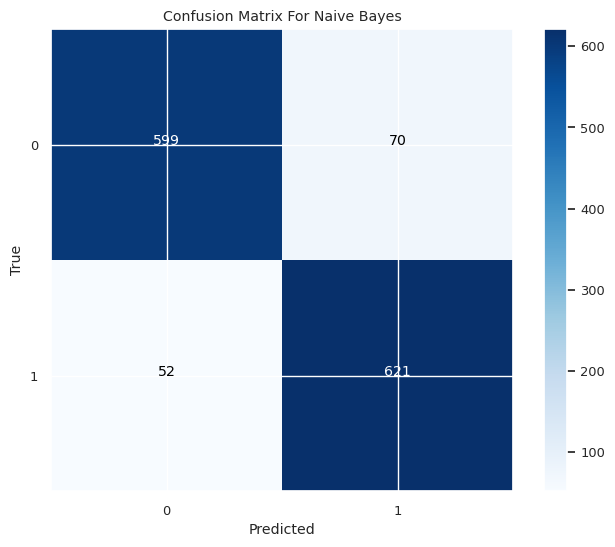

In [ ]:
cm = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix For Naive Bayes')
plt.colorbar()
tick_marks = range(len(set(Y_test)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(tick_marks)):
    for j in range(len(tick_marks)):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='White' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()
#cm

In [ ]:
#Evaluation Metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert numeric predictions back to string labels
X_test_prediction_labels = ['REAL' if pred == 1 else 'FAKE' for pred in X_test_prediction]

precision = precision_score(Y_test, X_test_prediction_labels, pos_label='REAL')
recall = recall_score(Y_test, X_test_prediction_labels, pos_label='REAL')

# Calculate F1 score using the formula
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.0
Recall: 0.0
F1 Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-30-0c0e619bf233>:11: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2 * (precision * recall) / (precision + recall)


**Verification** from Test Data Set

In [ ]:
X_new = X_test[3]

prediction_logistic = logistic_model.predict(X_new)
prediction_svm = svm_classifier.predict(X_new)
prediction_nb = naive_model.predict(X_new)

if (prediction_logistic[0]==0):
  print('Logistic Model predicts the news being Real')
else:
  print('Logistic Model predicts the news is Fake')


if (prediction_svm[0]==0):
  print('SVM predicts the news being Real')
else:
  print('SVM predicts the news is Fake')


if (prediction_nb[0]==0):
  print('Naive Bayes predicts the news being Real')
else:
  print('Naive Bayes predicts the news is Fake')

Logistic Model predicts the news is Fake
SVM predicts the news is Fake
Naive Bayes predicts the news is Fake


   Out of the three models SVM is giving more accurate results than the other two , hence for fake news detection we will go ahead with Support Vector Model.



**NEURAL NETWORK**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from tensorflow.keras.layers import Dense, Embedding, Activation, Flatten,Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import io
from tensorflow.keras.layers import LSTM,Bidirectional
import pandas as pd
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.models import load_model
import pickle
from sklearn.utils import shuffle
from keras.optimizers import SGD

Same pre-processing as done earlier - removing stop words and applying stemming


**Initialize a tokenizer with specific filters and an out-of-vocabulary token.
Fit the tokenizer on the 'content' column of the 'news_dataset'.**

In [ ]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n',oov_token="")
tokenizer.fit_on_texts(news_dataset_NN['content'])

**Create a dictionary of words and their corresponding numeric indices from the trained tokenizer.**

**This mapping of words to indices is crucial for converting text data into sequences of numbers, which is often required for feeding text data into machine learning models, such as neural networks.**

In [ ]:
word_index = tokenizer.word_index
print(word_index)

{'': 1, 'trump': 2, 'said': 3, 'clinton': 4, 'state': 5, 'would': 6, 'one': 7, 'peopl': 8, 'presid': 9, 'year': 10, 'republican': 11, 'like': 12, 'say': 13, 'time': 14, 'new': 15, 'campaign': 16, 'obama': 17, 'american': 18, 'elect': 19, 'also': 20, 'us': 21, 'democrat': 22, 'hillari': 23, 'go': 24, 'polit': 25, 'vote': 26, 'support': 27, 'make': 28, 'parti': 29, 'get': 30, 'even': 31, 'could': 32, 'nation': 33, 'govern': 34, 'report': 35, 'right': 36, 'use': 37, 'countri': 38, 'mani': 39, 'two': 40, 'u': 41, 'call': 42, 'candid': 43, 'day': 44, 'first': 45, 'work': 46, 'take': 47, 'hous': 48, 'think': 49, 'way': 50, 'want': 51, 'world': 52, 'back': 53, 'voter': 54, 'know': 55, 'come': 56, 'white': 57, 'war': 58, 'last': 59, 'news': 60, 'donald': 61, 'need': 62, 'presidenti': 63, 'percent': 64, 'sander': 65, 'email': 66, 'well': 67, 'may': 68, 'attack': 69, 'includ': 70, 'law': 71, 'issu': 72, 'unit': 73, 'point': 74, 'much': 75, 'see': 76, 'show': 77, 'polici': 78, 'told': 79, 'chang'

**Tokenize the text data in 'news_dataset' and convert it to sequences of numbers using the trained tokenizer.**

**Then, pad the sequences to have the same length for further processing.**

In [ ]:
X_train = tokenizer.texts_to_sequences(news_dataset_NN['content'])
X_train = pad_sequences(X_train,padding='post')

In [ ]:
print(news_dataset['content'][1])
print(X_train[1])

googl pinterest digg linkedin reddit stumbleupon print delici pocket tumblr two fundament truth world paul ryan desper want presid paul ryan never presid today prove particularli stagger exampl polit cowardic paul ryan revers cours announc back trump train aboutfac week ago previous declar would support defend trump tape made public trump brag assault women suddenli ryan appear pro trump ralli boldli declar alreadi sent vote make presid unit state surreal moment figurehead republican parti dose gasolin got stage chilli afternoon wisconsin lit match speakerryan say vote realdonaldtrump republican time come home http co vytt yvoe pic twitter com wcvscg abc news polit abcpolit novemb democrat parti ask better moment film ryan chanc ever becom presid went zero instant wreckag trump leav behind wake cravenli back campaign recov ryan career manag limp way dnc tape lock load use everi ad elect day ring endors man clearli hate person level speak volum spineless ryan postur principl conserv one

**Calculate the vocabulary size, encode labels using LabelEncoder, and one-hot encode the labels.**

In [ ]:
vocab_size = len(word_index)+1
label_encoder  = LabelEncoder()
Y = news_dataset['label'].values
Y_train = label_encoder.fit_transform(Y)
Y_train = to_categorical(Y_train,num_classes=2)
print(Y_train)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:
# Function Definition:
def keras_model(X_train):
    # Calculate the maximum sequence length in X_train
    max_len = len(X_train[0])

    # Set the dimensionality of word embeddings
    embedding_dim = 8

    # Calculate the vocabulary size (plus one for out-of-vocabulary token)
    vocab_size = len(word_index) + 1

    # Create a Sequential Keras model
    model = Sequential()

    # Add an embedding layer to convert word indices to embeddings
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))

    # Add a Global Average Pooling 1D layer for dimension reduction
    model.add(GlobalAveragePooling1D())

    # Add a dense layer with 16 units and ReLU activation
    model.add(Dense(16, activation='relu'))

    # Add a final dense layer with 2 unit (for binary classification) and softmax activation
    model.add(Dense(2,activation='softmax'))
    # Compile the model with categorical cross-entropy loss, Adam optimizer, and accuracy metric

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    # Display a summary of the model architecture
    model.summary()

    # Return the compiled Keras model
    return model


Define Number of Epochs (loops) = 5 and fit the model on training dataset.

In [ ]:
num_epochs = 5
model = keras_model(X_train)
history=model.fit(X_train,Y_train,epochs=num_epochs,shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10293, 8)          351320    
                                                                 
 global_average_pooling1d (  (None, 8)                 0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 351498 (1.34 MB)
Trainable params: 351498 (1.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
210/210 [==============================] - 8s 32ms/step - loss: 0.6930 - acc

In [ ]:
#Reverse the word_index dictionary for easy use
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

#This will download vectors and meta data file which we have to upload on https://projector.tensorflow.org/ to see the visual.

out_v = io.open('vecs_dp.tsv','w',encoding='utf-8')
out_m = io.open('meta_dp.tsv','w',encoding='utf-8')

for word_num in range(1,weights.shape[0]):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + '\n')
  out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
out_v.close()
out_m.close()

**Make Prediction on unseen data by converting it from text to sequence.**

In [ ]:

sentence = np.array(["Truth Broadcast Network Keiser Report: Meme Wars (E995)"])
sentence = tokenizer.texts_to_sequences(sentence)
sentence = pad_sequences(sentence,padding='post',maxlen=len(X_train[0]))

class_dict = {0:"Legit",1:"Fake"}

In [ ]:
prediction = model.predict(sentence)
print(prediction)
predicted_classes = np.argmax(prediction, axis=1)
print(class_dict[predicted_classes[0]])

1/1 [==============================] - 0s 166ms/step
[[0.6101772  0.38982272]]
Legit


In [ ]:
#Some Examples to test from testing set

#actual label = 0 Legit
sentence1 = "David Streitfeld Specter of Trump Loosens Tongues, if Not Purse Strings, in Silicon Valley - The New York Times"

#actual label = 1 Fake
sentence2 = "Truth Broadcast Network Keiser Report: Meme Wars (E995)"